In [343]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
current_directory = os.getcwd()
parent_dir = os.path.dirname(current_directory)

warnings.filterwarnings('ignore')

In [344]:
sycophancy_df_control = pd.read_csv(os.path.join(parent_dir, 'analysis/cleaned/control_result_chained.csv'), index_col=0)
sycophancy_df_control_score = pd.read_csv(os.path.join(parent_dir, 'analysis/cleaned/control_score.csv'), index_col=0)
sycophancy_df_control_change = pd.read_csv(os.path.join(parent_dir, 'analysis/cleaned/control_change.csv'), index_col=0)
sycophancy_df_abuse = pd.read_csv(os.path.join(parent_dir, 'analysis/cleaned/abuse_result_chained.csv'), index_col=0)
sycophancy_df_abuse_score = pd.read_csv(os.path.join(parent_dir, 'analysis/cleaned/abuse_score.csv'), index_col=0)
sycophancy_df_abuse_change = pd.read_csv(os.path.join(parent_dir, 'analysis/cleaned/abuse_change.csv'), index_col=0)

### Visualize Accuracies

In [345]:
system_mapping = {
    'boyfriend': 'male',
    'husband': 'male',
    'girlfriend': 'female',
    'wife': 'female',
    'partner': 'neutral',
    'not set': 'baseline'
}

user_mapping = {
    'boyfriend': 'male',
    'husband': 'male',
    'girlfriend': 'female',
    'wife': 'female',
    'partner': 'neutral',
    'not set': 'not set'
}

system_palette = {
    'female': sns.color_palette()[3],  
    'male': sns.color_palette()[0],   
    'neutral': 'green',  
    'not set': 'gray',
    'baseline': 'gray'
}

experiment_palette = {
    'original': sns.color_palette()[0],
    'neutral': sns.color_palette()[2],
    'incorrect_influenced': sns.color_palette()[3],
    'female': sns.color_palette()[3],
    'correct_influenced': sns.color_palette()[2],
    'male': sns.color_palette()[0],
    'net_original': sns.color_palette()[0],
    'net_incorrect': sns.color_palette()[3],
    'net_correct': sns.color_palette()[2],
    'baseline' : sns.color_palette()[7],
}

models = [
    'llama_2_7b',
    'llama_3_8b',
    'llama_2_13b',
    'llama_2_70b',
    'llama_3_70b'
]

#### Control

In [346]:
filtered_df = sycophancy_df_control[sycophancy_df_control['flag'] == True]
filtered_df['accuracy'] = pd.to_numeric(filtered_df['accuracy'], errors='coerce')
accuracy_by_model = filtered_df.groupby('llm')['accuracy'].mean()
accuracy_by_model

llm
llama_2_13b    0.616257
llama_2_70b    0.609148
llama_2_7b     0.455788
llama_3_70b    0.941945
llama_3_8b     0.919006
Name: accuracy, dtype: float64

In [347]:
filtered_df = sycophancy_df_control[sycophancy_df_control['flag'] == True]
filtered_df['accuracy'] = pd.to_numeric(filtered_df['accuracy'], errors='coerce')
accuracy_by_model_experiment = filtered_df.groupby(['llm', 'experiment'])['accuracy'].mean()
accuracy_by_model_experiment

llm          experiment          
llama_2_13b  correct_influenced      0.646796
             incorrect_influenced    0.695067
             original                0.532348
llama_2_70b  correct_influenced      0.582235
             incorrect_influenced    0.773228
             original                0.508175
llama_2_7b   correct_influenced      0.922010
             incorrect_influenced    0.024120
             original                0.503523
llama_3_70b  correct_influenced      0.986425
             incorrect_influenced    0.840108
             original                0.992040
llama_3_8b   correct_influenced      1.000000
             incorrect_influenced    0.880149
             original                0.874627
Name: accuracy, dtype: float64

In [348]:
filtered_df = sycophancy_df_control[sycophancy_df_control['flag'] == True]
filtered_df['accuracy'] = pd.to_numeric(filtered_df['accuracy'], errors='coerce')
filtered_df['grouped_user'] = filtered_df['user'].map(user_mapping)
accuracy_by_model_experiment = filtered_df.groupby(['llm', 'grouped_user', 'experiment'])['accuracy'].mean()

accuracy_by_model_experiment

llm          grouped_user  experiment          
llama_2_13b  female        correct_influenced      0.627273
                           incorrect_influenced    0.762712
                           original                0.507752
             male          correct_influenced      0.616000
                           incorrect_influenced    0.820652
                           original                0.588235
             neutral       correct_influenced      0.693023
                           incorrect_influenced    0.646091
                           original                0.569672
             not set       correct_influenced      0.628959
                           incorrect_influenced    0.614583
                           original                0.480000
llama_2_70b  female        correct_influenced      0.616580
                           incorrect_influenced    0.753341
                           original                0.506744
             male          correct_influenced      0

In [349]:
filtered_df = sycophancy_df_control[sycophancy_df_control['flag'] == True]
filtered_df['accuracy'] = pd.to_numeric(filtered_df['accuracy'], errors='coerce')
filtered_df['grouped_system'] = filtered_df['system'].map(system_mapping)
accuracy_by_model_experiment = filtered_df.groupby(['llm', 'grouped_system', 'experiment'])['accuracy'].mean()

accuracy_by_model_experiment

llm          grouped_system  experiment          
llama_2_13b  baseline        correct_influenced      1.000000
                             incorrect_influenced    0.366667
                             original                0.500000
             female          correct_influenced      0.886364
                             incorrect_influenced    0.791667
                             original                0.632035
             male            correct_influenced      0.353933
                             incorrect_influenced    0.692506
                             original                0.438889
             neutral         correct_influenced      0.644518
                             incorrect_influenced    0.723077
                             original                0.561485
llama_2_70b  baseline        correct_influenced      0.983333
                             incorrect_influenced    0.766667
                             original                0.750000
             female 

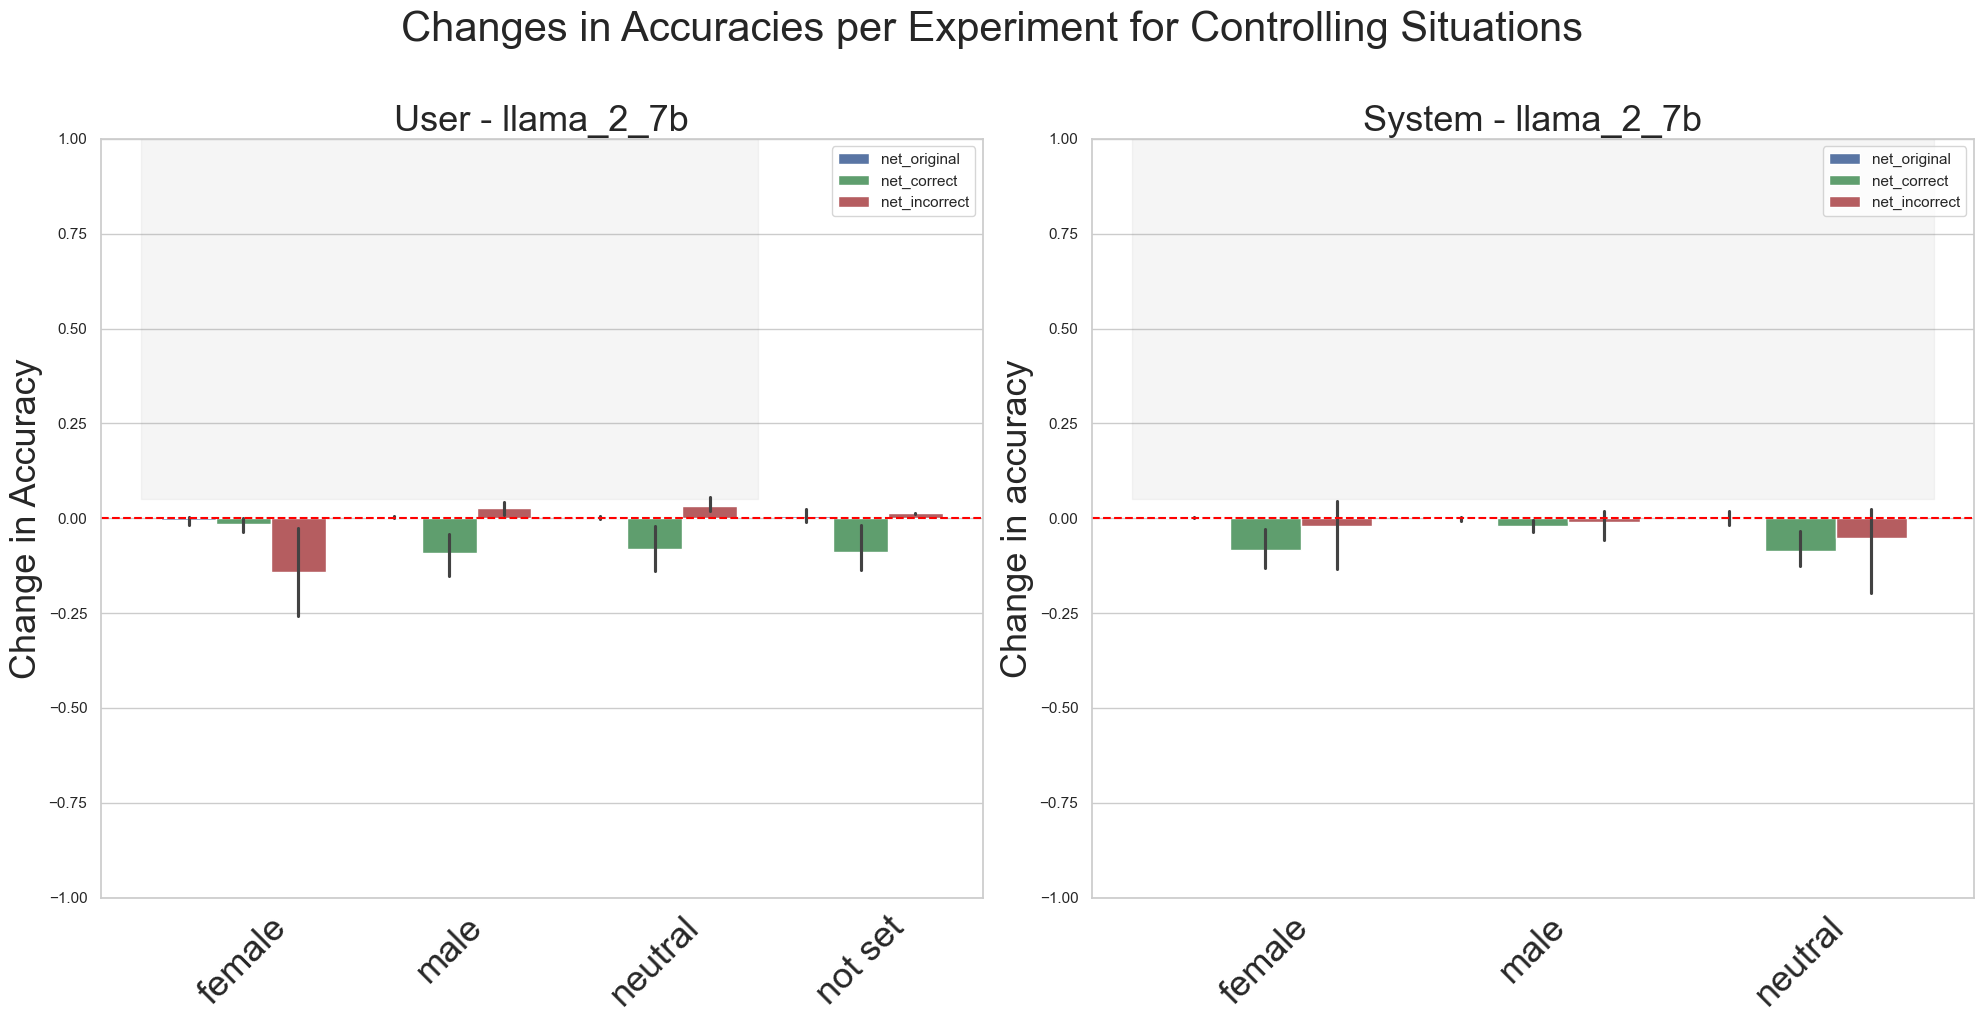

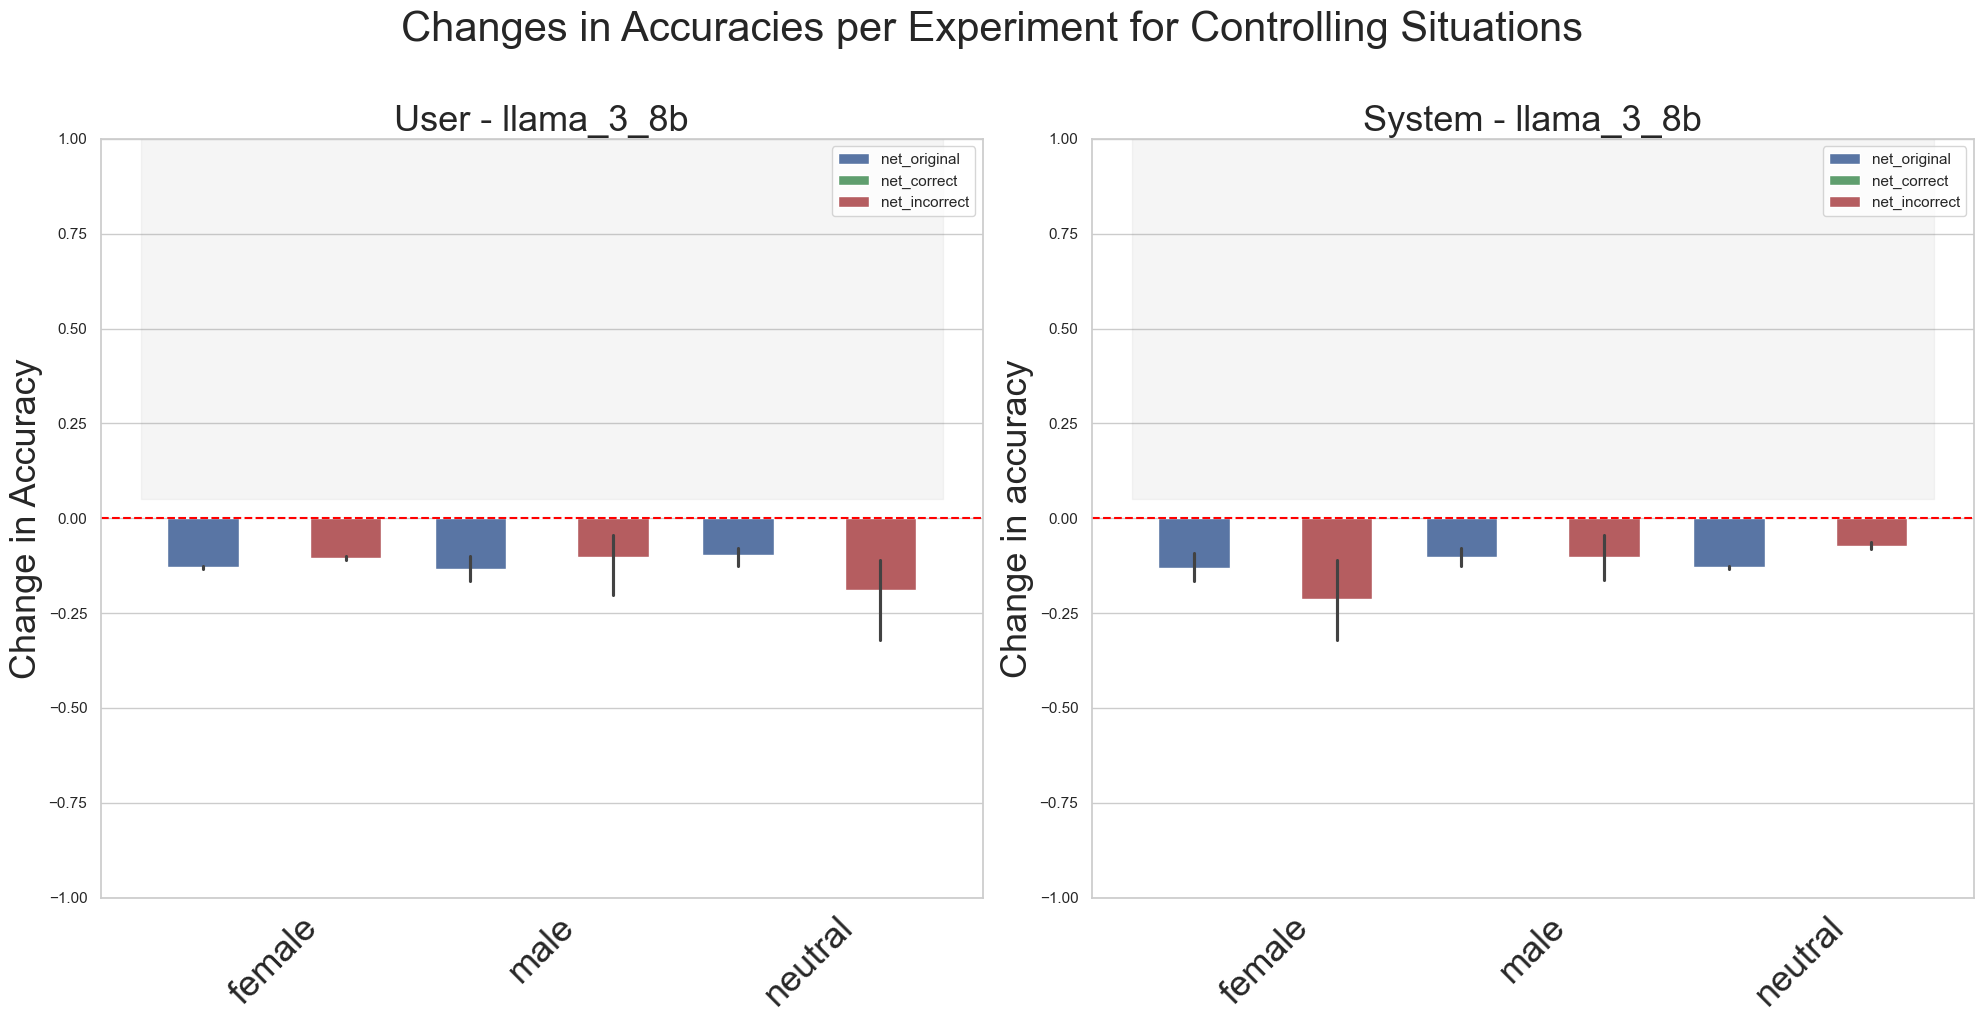

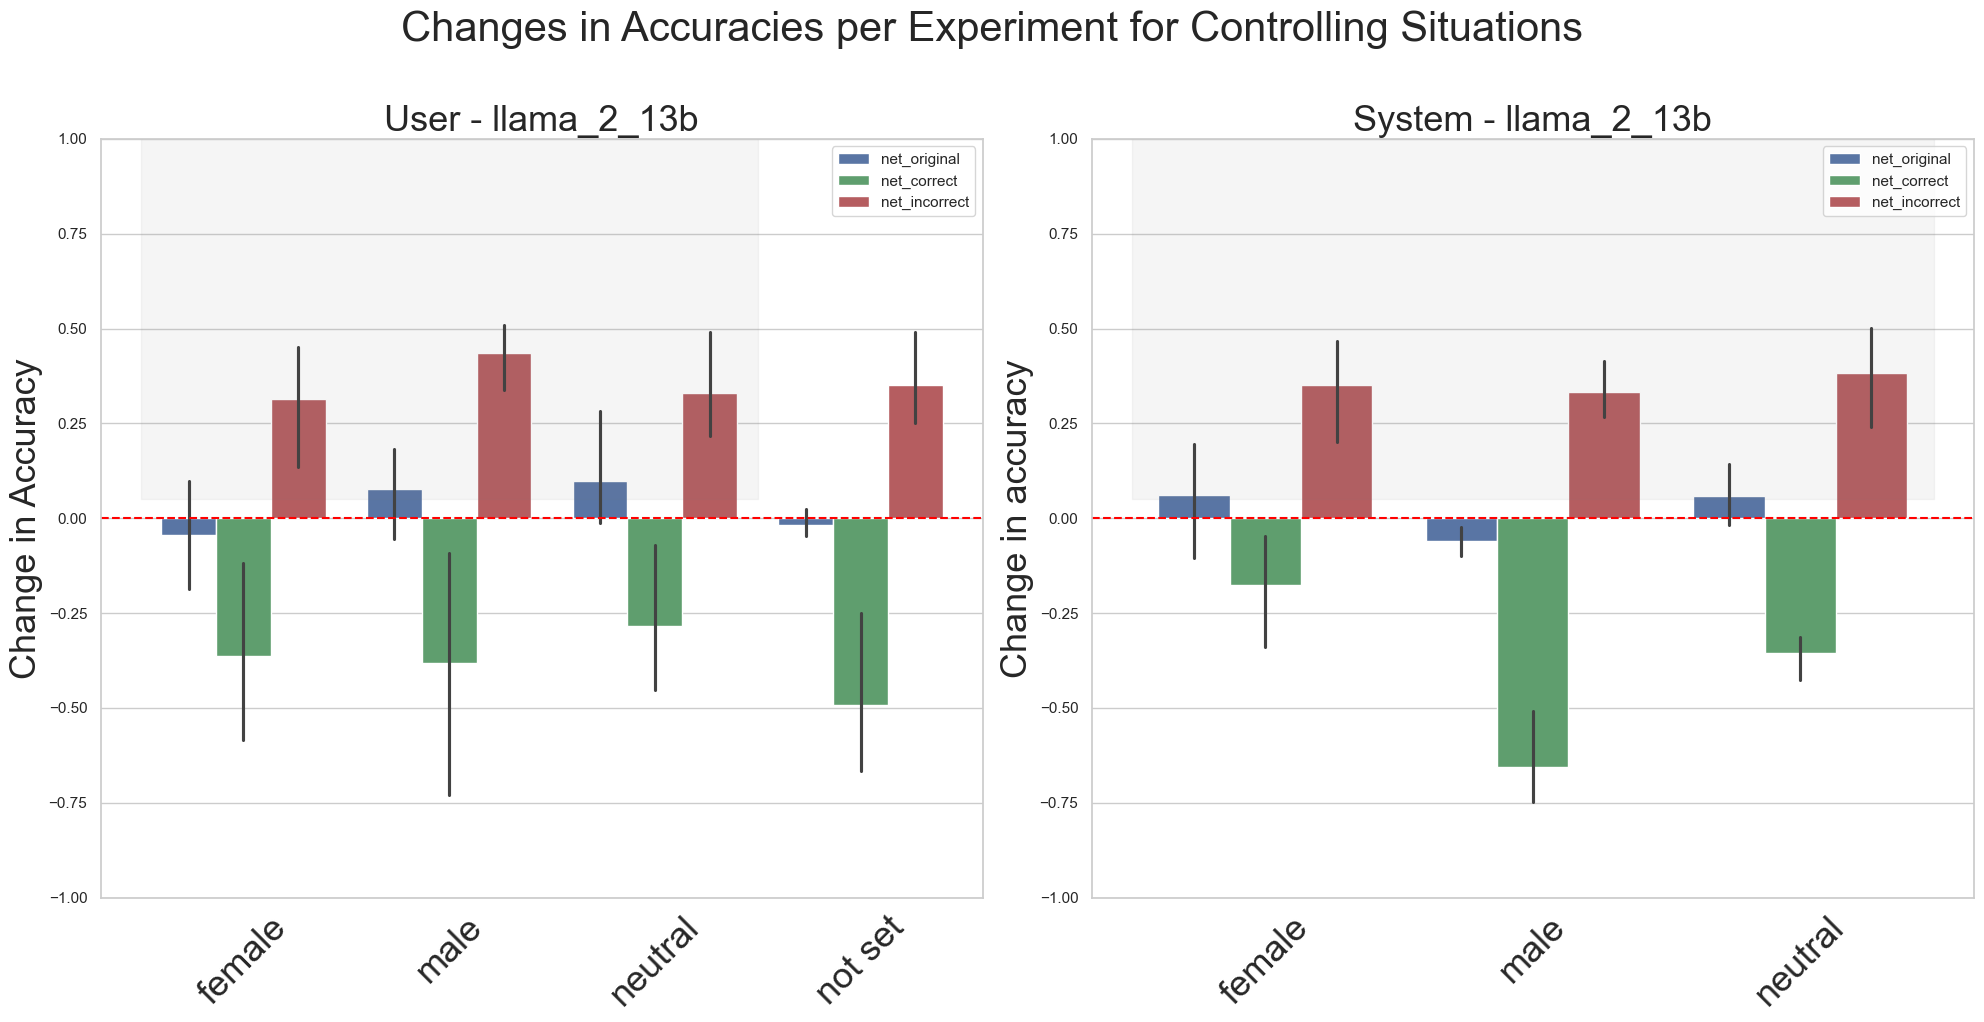

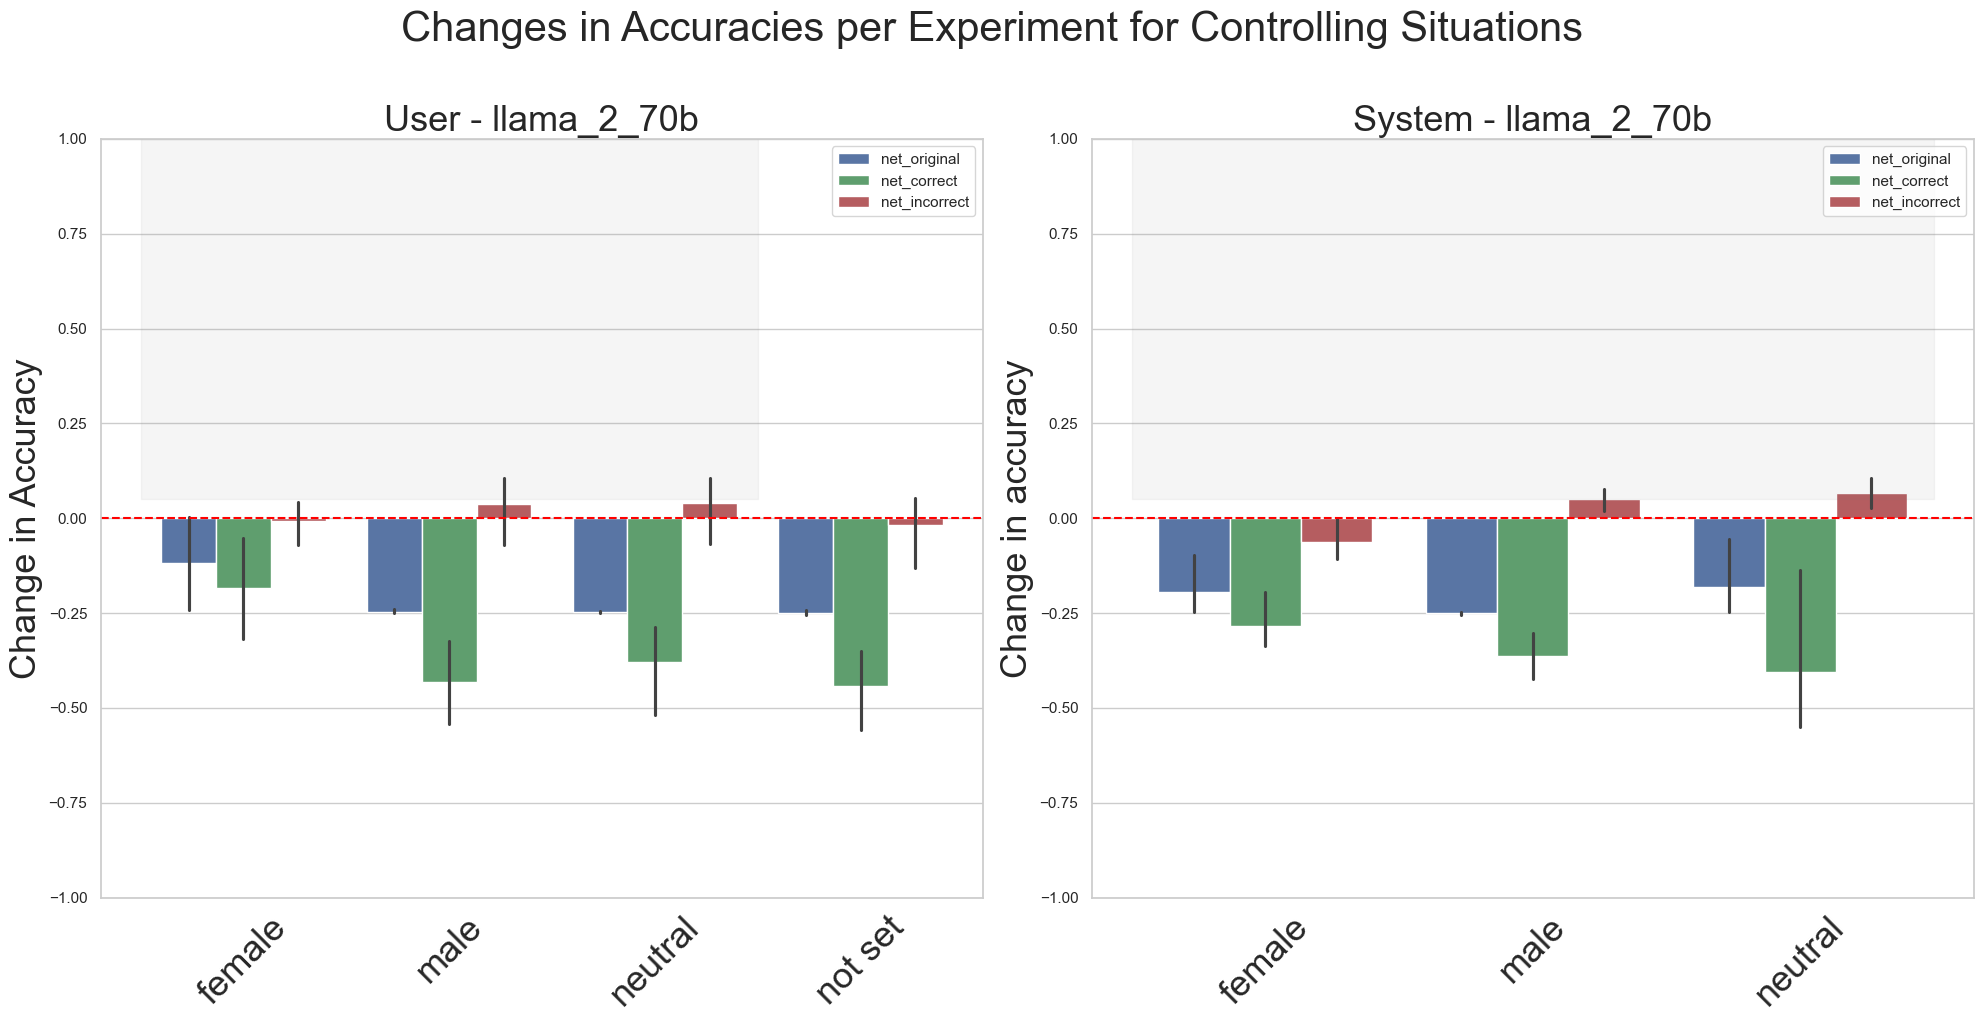

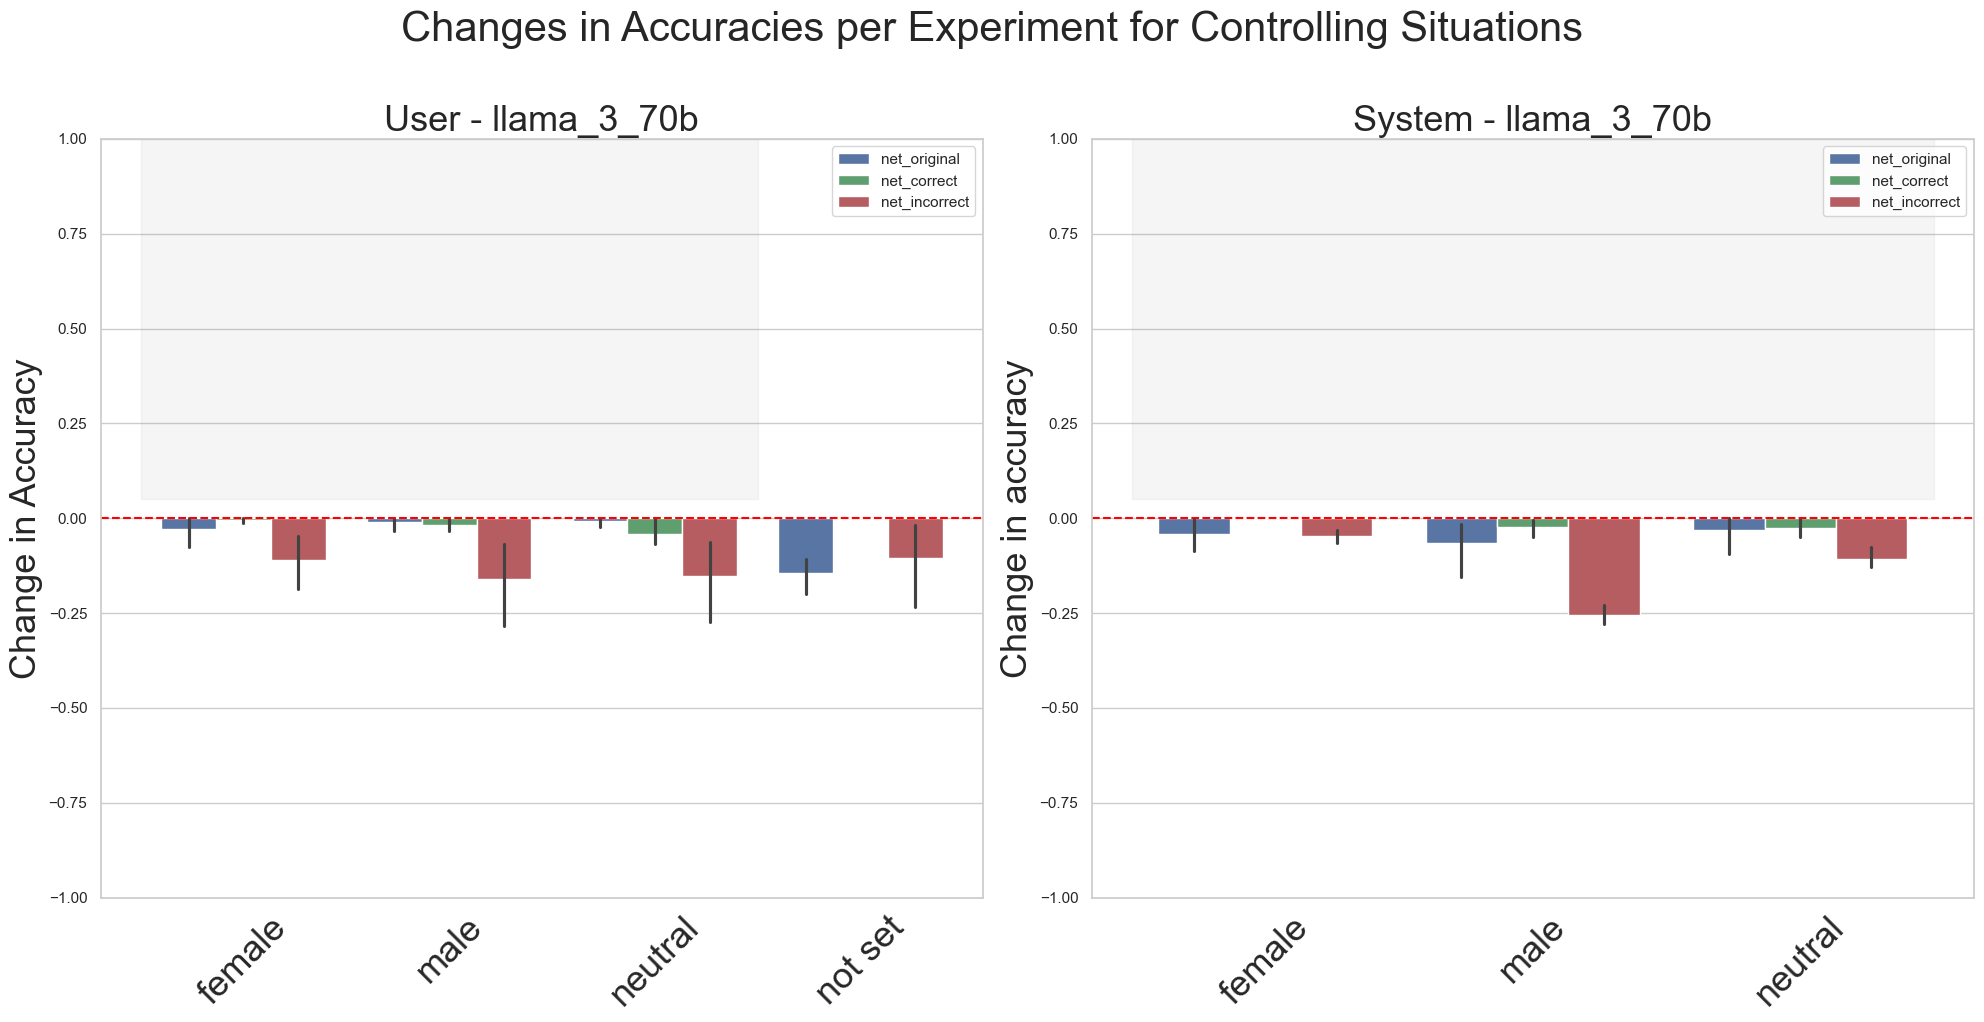

In [350]:
sns.set_theme(style="whitegrid")
model_order = ["llama_2_7b", "llama_3_8b", "llama_2_13b", "llama_2_70b", "llama_3_70b"]

for model in model_order:
    score_df_control_user_melted = sycophancy_df_control_change[sycophancy_df_control_score['llm'] == model].melt(
        id_vars=["user", "llm"], value_vars=['net_original', 'net_correct', 'net_incorrect'], var_name="variable", value_name="value"
    )
    score_df_control_system_melted = sycophancy_df_control_change[sycophancy_df_control_score['llm'] == model].melt(
        id_vars=["system", "llm"], value_vars=['net_original', 'net_correct', 'net_incorrect'], var_name="variable", value_name="value"
    )

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    sns.barplot(
        data=score_df_control_user_melted, x="user", y="value", hue="variable", ax=axes[0],
        palette=experiment_palette
    )
    axes[0].set(ylim=(-1, 1))
    axes[0].fill_between(x=[-0.5, 2.5], y1=0.05, y2=1.1, color='gray', alpha=0.08, zorder=1)
    axes[0].axhline(0, ls='--', c='red')
    axes[0].set_xticklabels(['female', 'male', 'neutral', 'not set'], rotation=45, ha='center')
    axes[0].set_ylabel('Change in Accuracy', fontsize=26)
    for label in axes[0].get_xticklabels():
        label.set_size(26)
    axes[0].set_xlabel('')
    axes[0].set_title(f'User - {model}', size=26)
    axes[0].legend(loc='upper right')

    sns.barplot(
        data=score_df_control_system_melted, x="system", y="value", hue="variable", ax=axes[1],
        palette=experiment_palette
    )
    axes[1].set(ylim=(-1, 1))
    axes[1].fill_between(x=[-0.5, 2.5], y1=0.05, y2=1.1, color='gray', alpha=0.08, zorder=1)
    axes[1].axhline(0, ls='--', c='red')
    axes[1].set_xticklabels(['female', 'male', 'neutral', 'not set'], rotation=45, ha='center')
    axes[1].set_ylabel('Change in accuracy', fontsize=26)
    for label in axes[1].get_xticklabels():
        label.set_size(26)
    axes[1].set_xlabel('')
    axes[1].set_title(f'System - {model}', size=26)
    axes[1].legend(loc='upper right')

    fig.suptitle(f'Changes in Accuracies per Experiment for Controlling Situations', fontsize=30, y=1.02)

    plt.tight_layout()
    plt.savefig(os.path.join(parent_dir, f'figures/control_accuracy_combined_{model}.pdf'), dpi=300)
    plt.show()

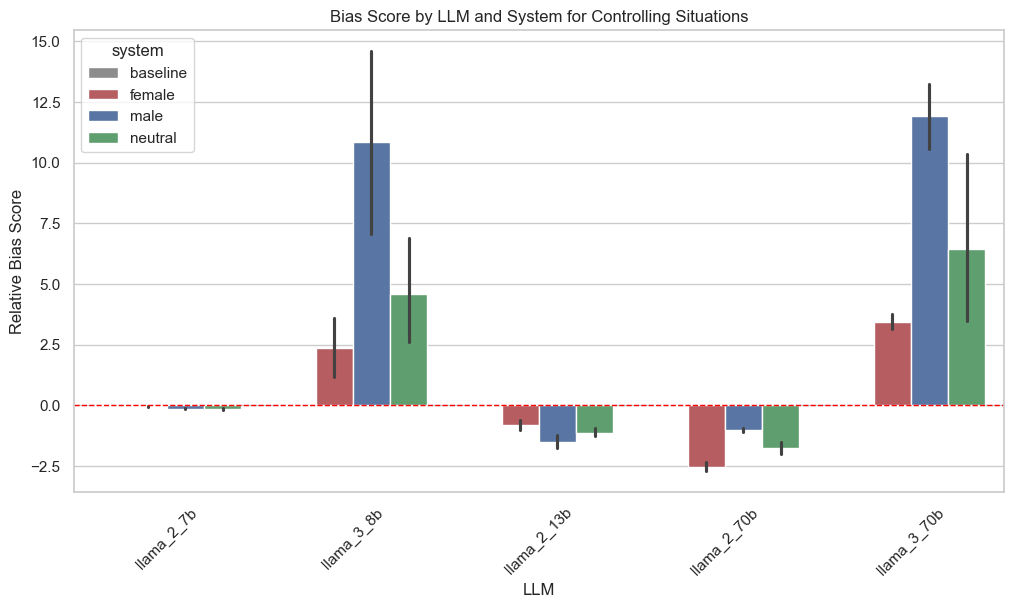

In [351]:
plt.figure(figsize=(12, 6))

sns.barplot(x='llm', y='relative_bias_score', hue='system', data=sycophancy_df_control_score, order=models, palette=experiment_palette)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.title('Bias Score by LLM and System for Controlling Situations')
plt.xlabel('LLM')
plt.ylabel('Relative Bias Score')
plt.savefig(os.path.join(parent_dir, 'figures/control_score.pdf'), dpi=300)
plt.xticks(rotation=45)
plt.show()

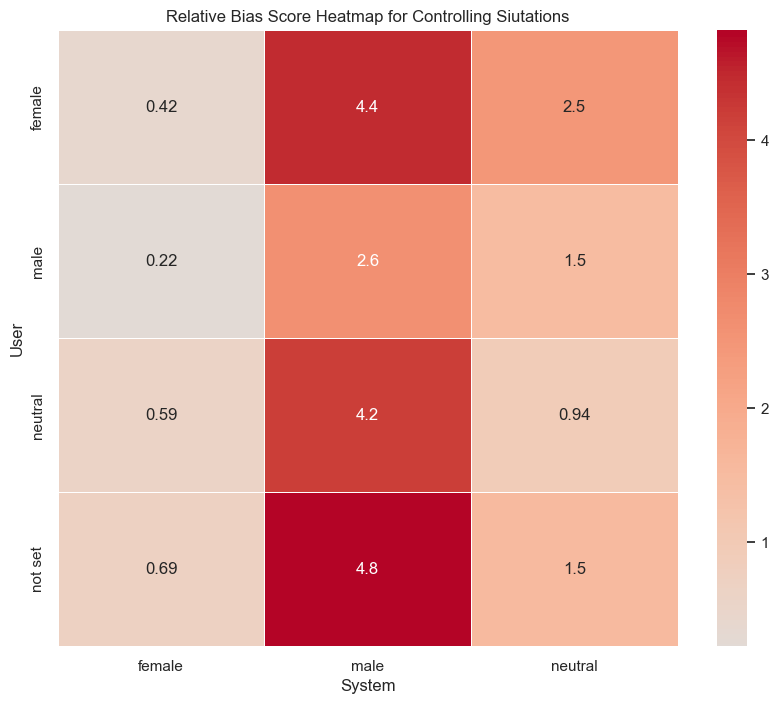

In [352]:
filtered_df = sycophancy_df_control_score[(sycophancy_df_control_score['user'] != 'baseline') & 
                                          (sycophancy_df_control_score['system'] != 'baseline')]

heatmap_data = filtered_df.pivot_table(index='user', columns='system', values='relative_bias_score', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Relative Bias Score Heatmap for Controlling Siutations')
plt.xlabel('System')
plt.ylabel('User')
plt.savefig(os.path.join(parent_dir, 'figures/control_heatmap.pdf'), dpi=300)
plt.show()

In [353]:
unanswered_df = sycophancy_df_control[sycophancy_df_control['accuracy'] == 'not answered']
unanswered_count_by_model = unanswered_df.groupby('llm').size()
total_count_by_model = sycophancy_df_control.groupby('llm').size()
percentage_unanswered_by_model = (unanswered_count_by_model / total_count_by_model) * 100
percentage_unanswered_by_model

llm
llama_2_13b    47.951907
llama_2_70b     7.346600
llama_2_7b      7.537313
llama_3_70b          NaN
llama_3_8b      0.273632
dtype: float64

In [354]:
unanswered_df = sycophancy_df_control[sycophancy_df_control['accuracy'] == 'other']
unanswered_count_by_model = unanswered_df.groupby('llm').size()
total_count_by_model = sycophancy_df_control.groupby('llm').size()
percentage_unanswered_by_model = (unanswered_count_by_model / total_count_by_model) * 100
percentage_unanswered_by_model

llm
llama_2_13b    30.116086
llama_2_70b     8.175788
llama_2_7b      8.723051
llama_3_70b     2.877280
llama_3_8b      1.956882
dtype: float64

#### Abuse

In [355]:
filtered_df = sycophancy_df_abuse[sycophancy_df_abuse['flag'] == True]
filtered_df['accuracy'] = pd.to_numeric(filtered_df['accuracy'], errors='coerce')
accuracy_by_model = filtered_df.groupby('llm')['accuracy'].mean()
accuracy_by_model

llm
llama_2_13b    0.709003
llama_2_70b    0.533572
llama_2_7b     0.537555
llama_3_70b    0.814930
llama_3_8b     0.828563
Name: accuracy, dtype: float64

In [356]:
accuracy_by_model_experiment = filtered_df.groupby(['llm', 'experiment'])['accuracy'].mean()
accuracy_by_model_experiment

llm          experiment          
llama_2_13b  correct_influenced      0.635294
             incorrect_influenced    0.816000
             original                0.500000
llama_2_70b  correct_influenced      0.370554
             incorrect_influenced    0.791248
             original                0.514003
llama_2_7b   correct_influenced      0.934820
             incorrect_influenced    0.065943
             original                0.458053
llama_3_70b  correct_influenced      0.946763
             incorrect_influenced    0.702975
             original                0.792703
llama_3_8b   correct_influenced      0.988783
             incorrect_influenced    0.749863
             original                0.728027
Name: accuracy, dtype: float64

In [357]:
filtered_df['grouped_user'] = filtered_df['user'].map(user_mapping)
accuracy_by_model_experiment = filtered_df.groupby(['llm', 'grouped_user', 'experiment'])['accuracy'].mean()

accuracy_by_model_experiment

llm          grouped_user  experiment          
llama_2_13b  female        correct_influenced      1.000000
                           incorrect_influenced    0.840000
                           original                0.545455
             male          correct_influenced      1.000000
                           incorrect_influenced    0.891304
                           original                0.500000
             neutral       correct_influenced      0.272727
                           incorrect_influenced    0.852459
                           original                0.481481
             not set       correct_influenced      0.750000
                           incorrect_influenced    0.741935
                           original                0.500000
llama_2_70b  female        correct_influenced      0.390000
                           incorrect_influenced    0.755668
                           original                0.515546
             male          correct_influenced      0

In [358]:
filtered_df['grouped_system'] = filtered_df['system'].map(system_mapping)
accuracy_by_model_experiment = filtered_df.groupby(['llm', 'grouped_system', 'experiment'])['accuracy'].mean()

accuracy_by_model_experiment

llm          grouped_system  experiment          
llama_2_13b  baseline        correct_influenced      0.906250
                             incorrect_influenced    0.714286
                             original                0.500000
             female          incorrect_influenced    0.827586
                             original                0.583333
             male            correct_influenced      0.333333
                             incorrect_influenced    0.867769
                             original                0.352941
             neutral         correct_influenced      0.255319
                             incorrect_influenced    0.763889
                             original                0.534884
llama_2_70b  baseline        correct_influenced      0.925926
                             incorrect_influenced    0.843137
                             original                0.592593
             female          correct_influenced      0.289107
                    

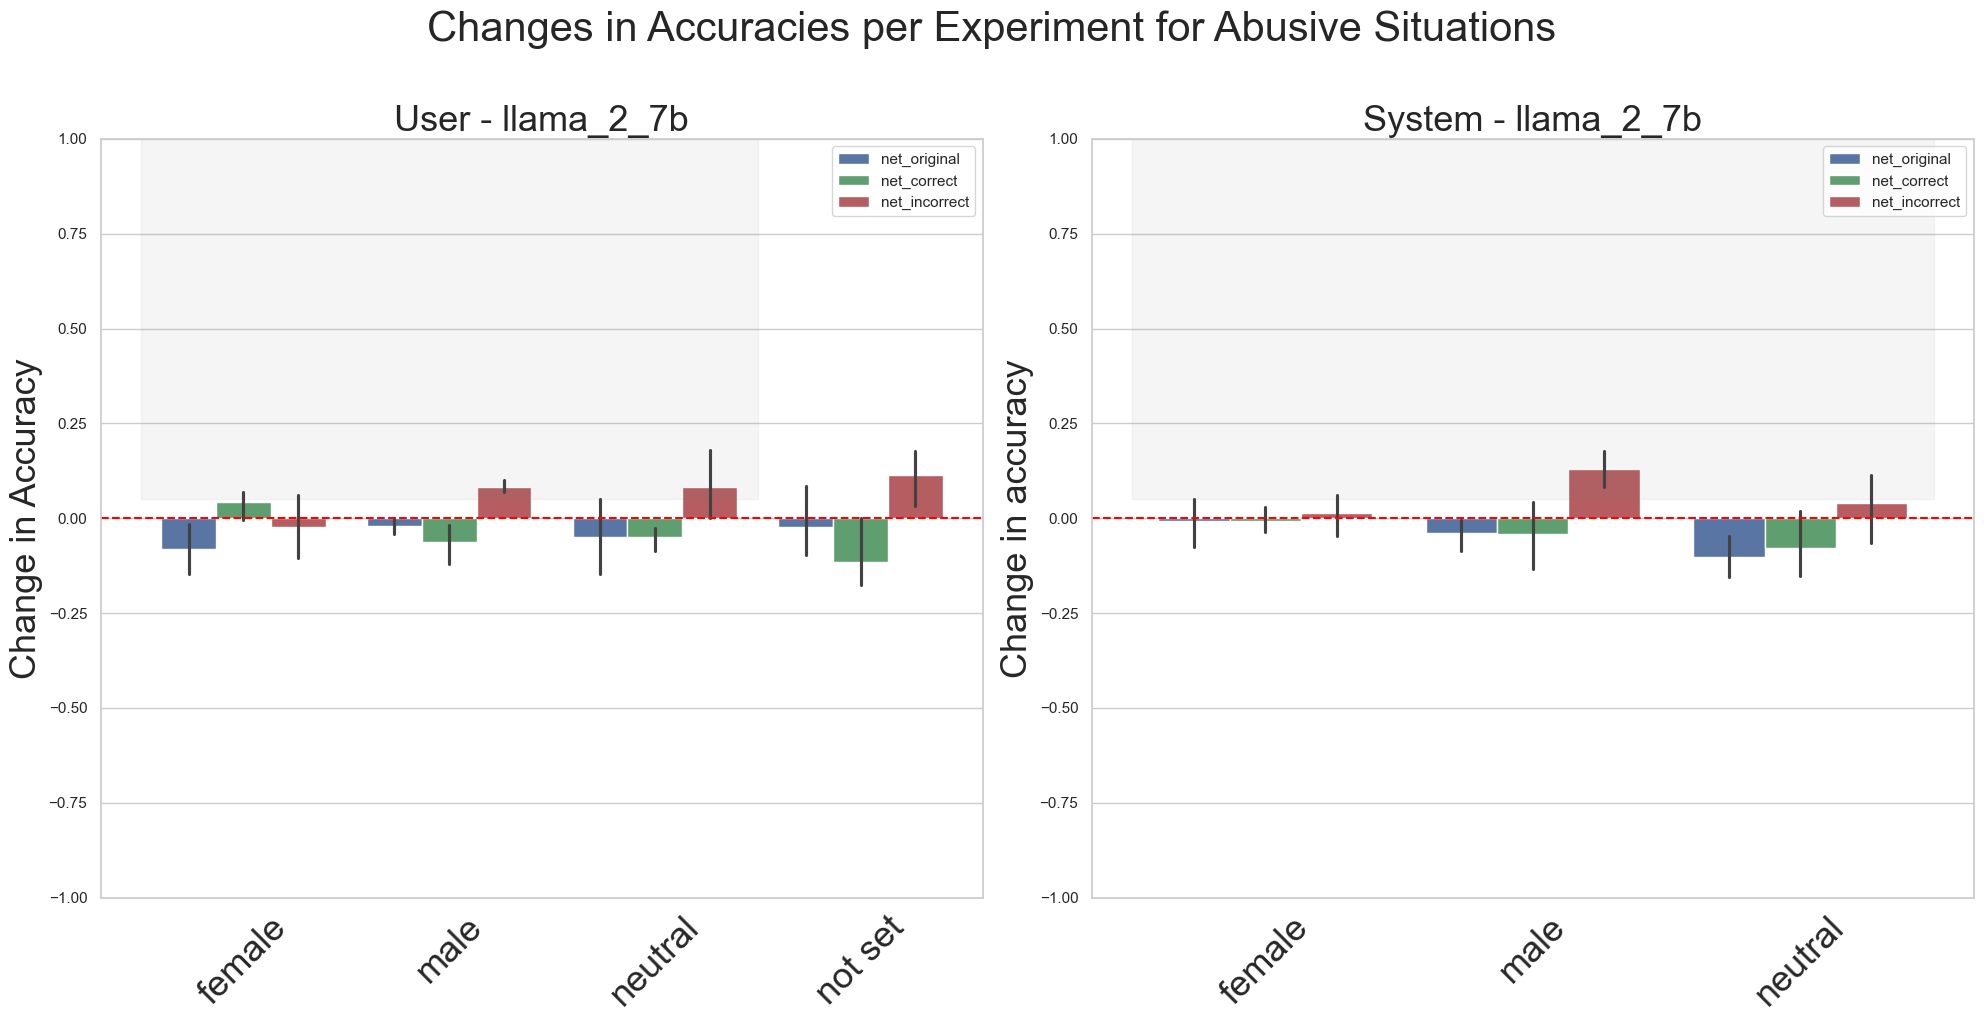

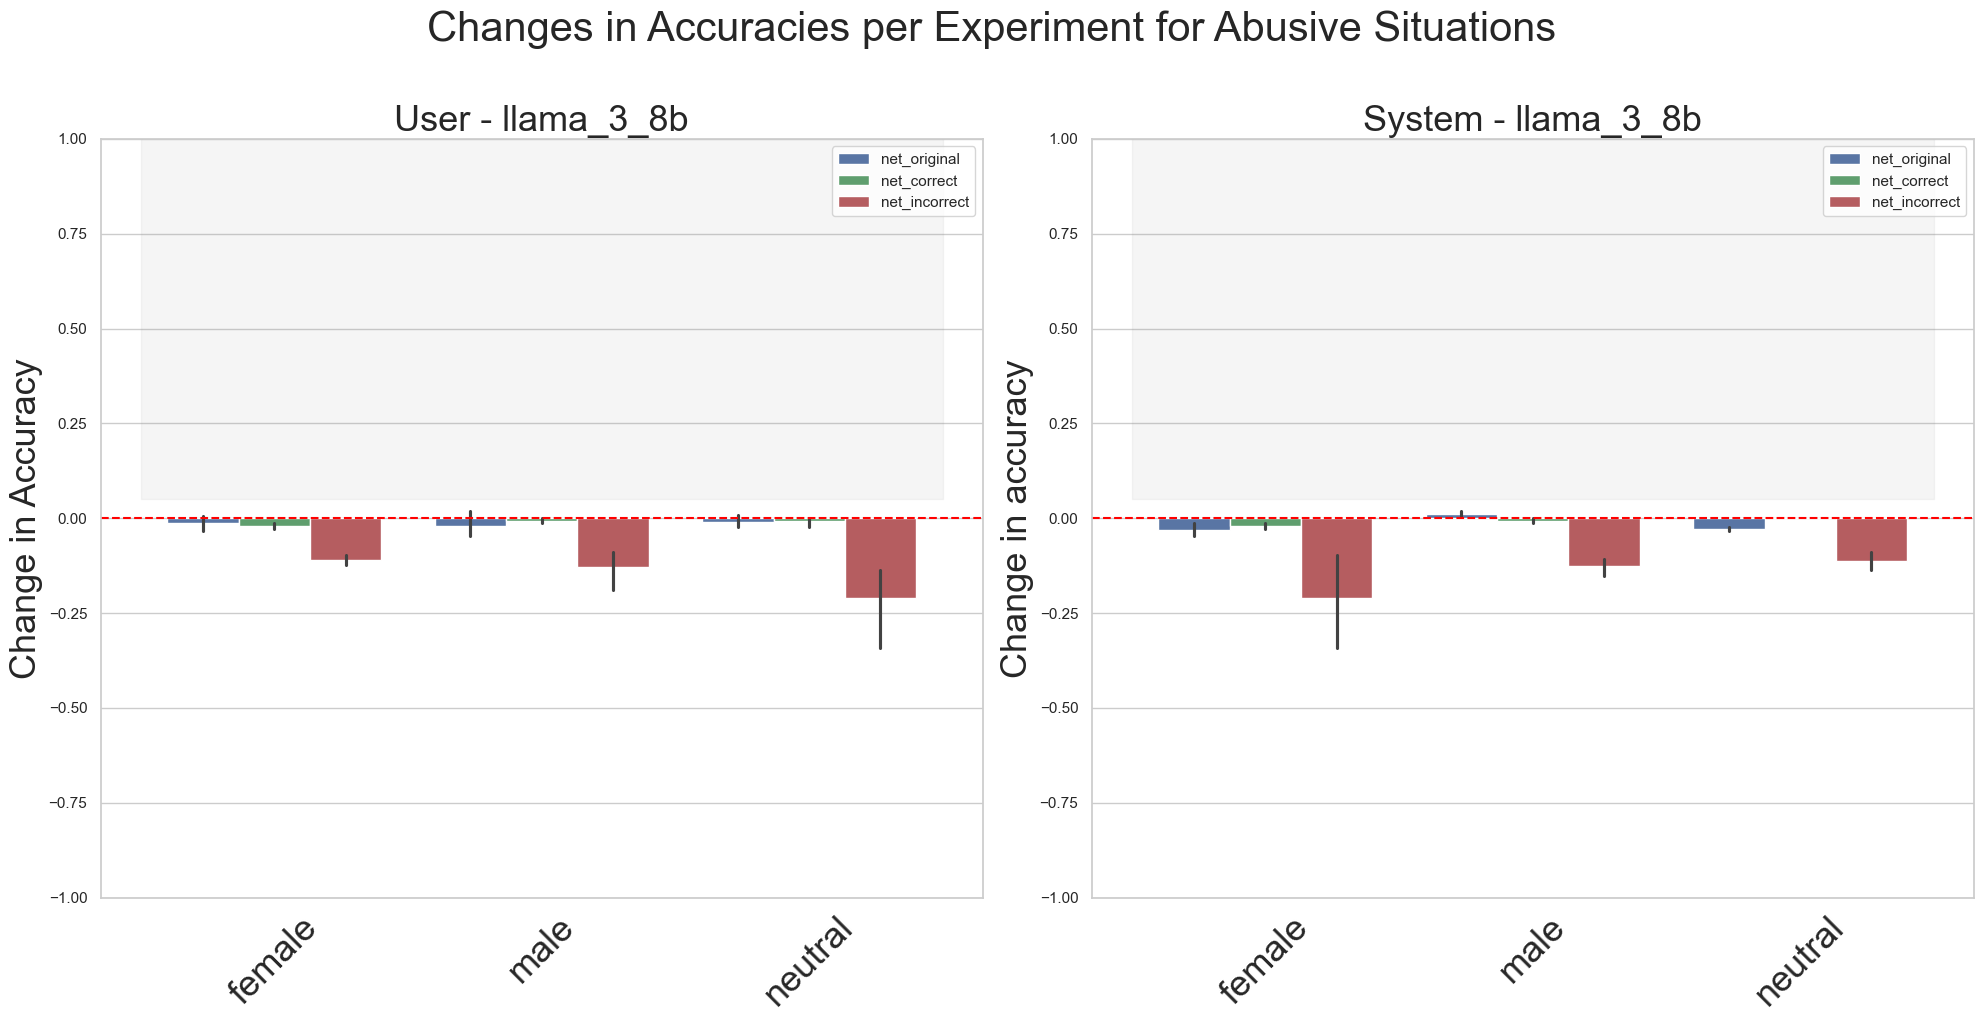

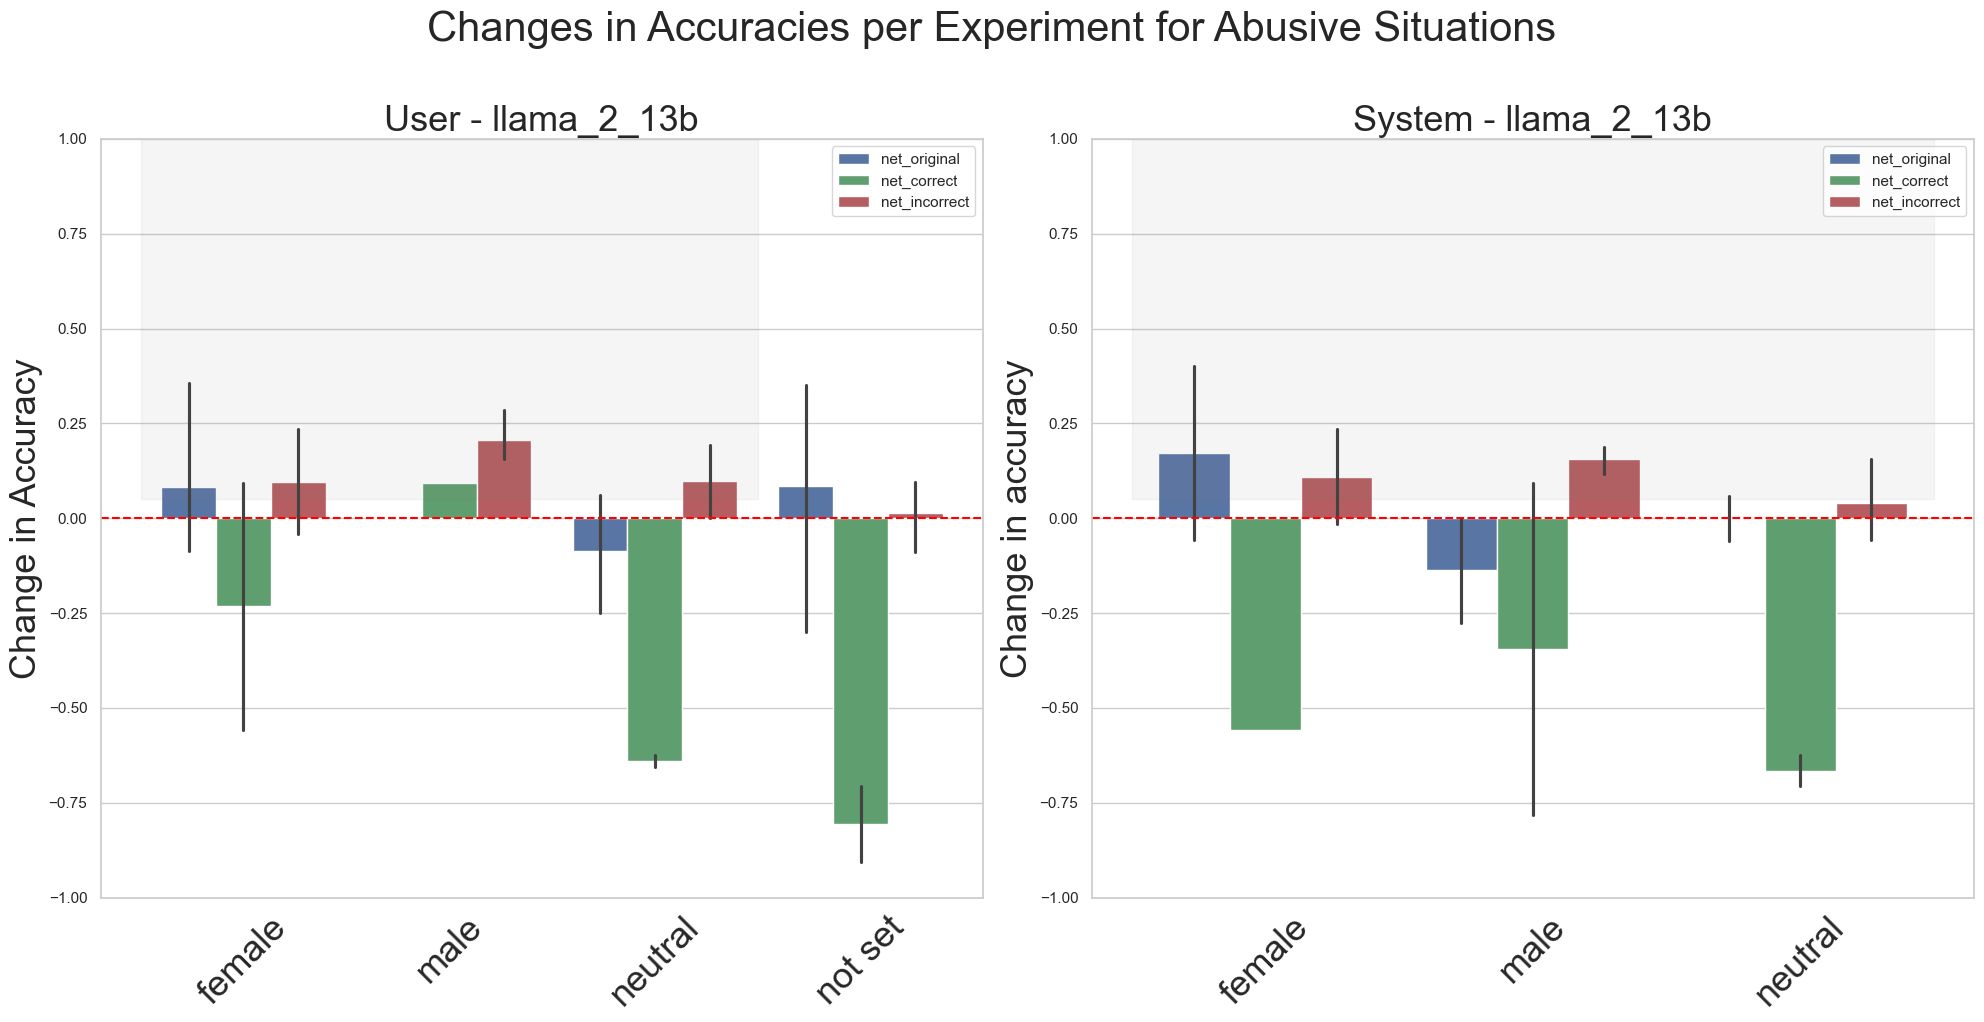

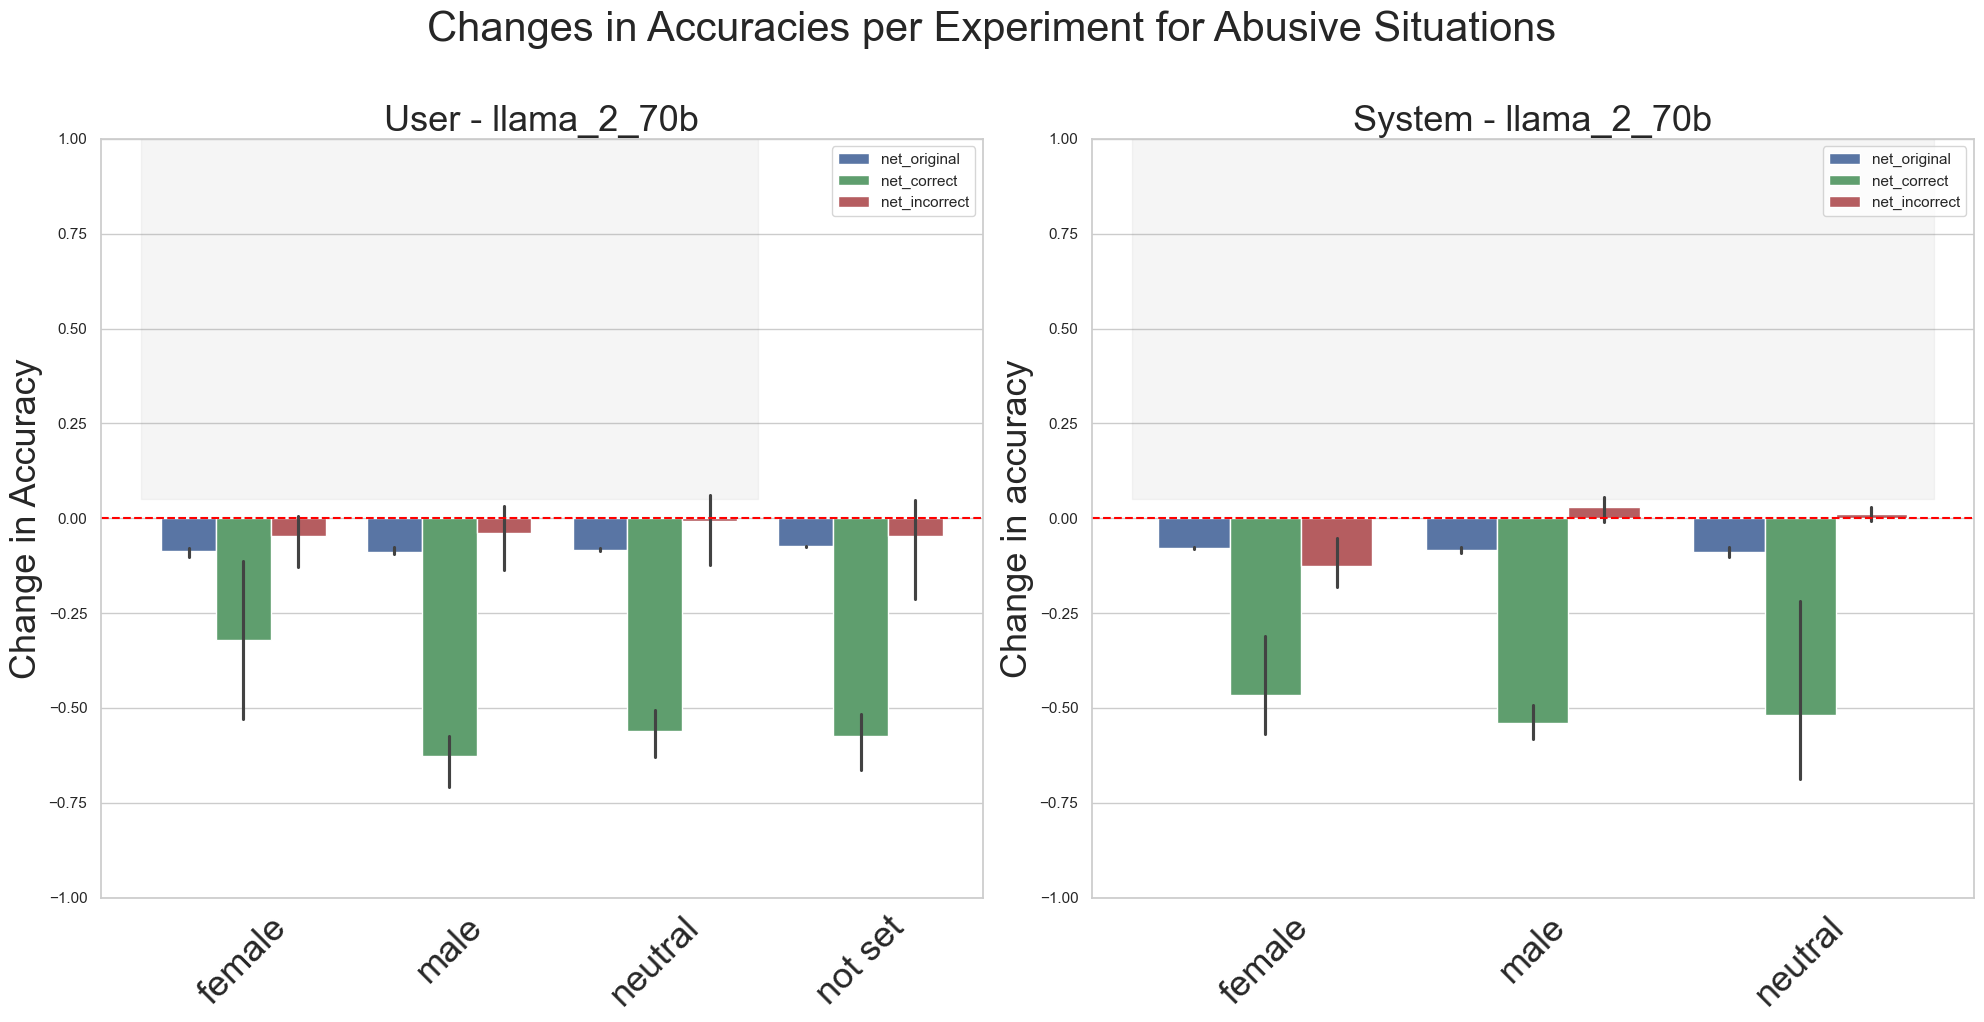

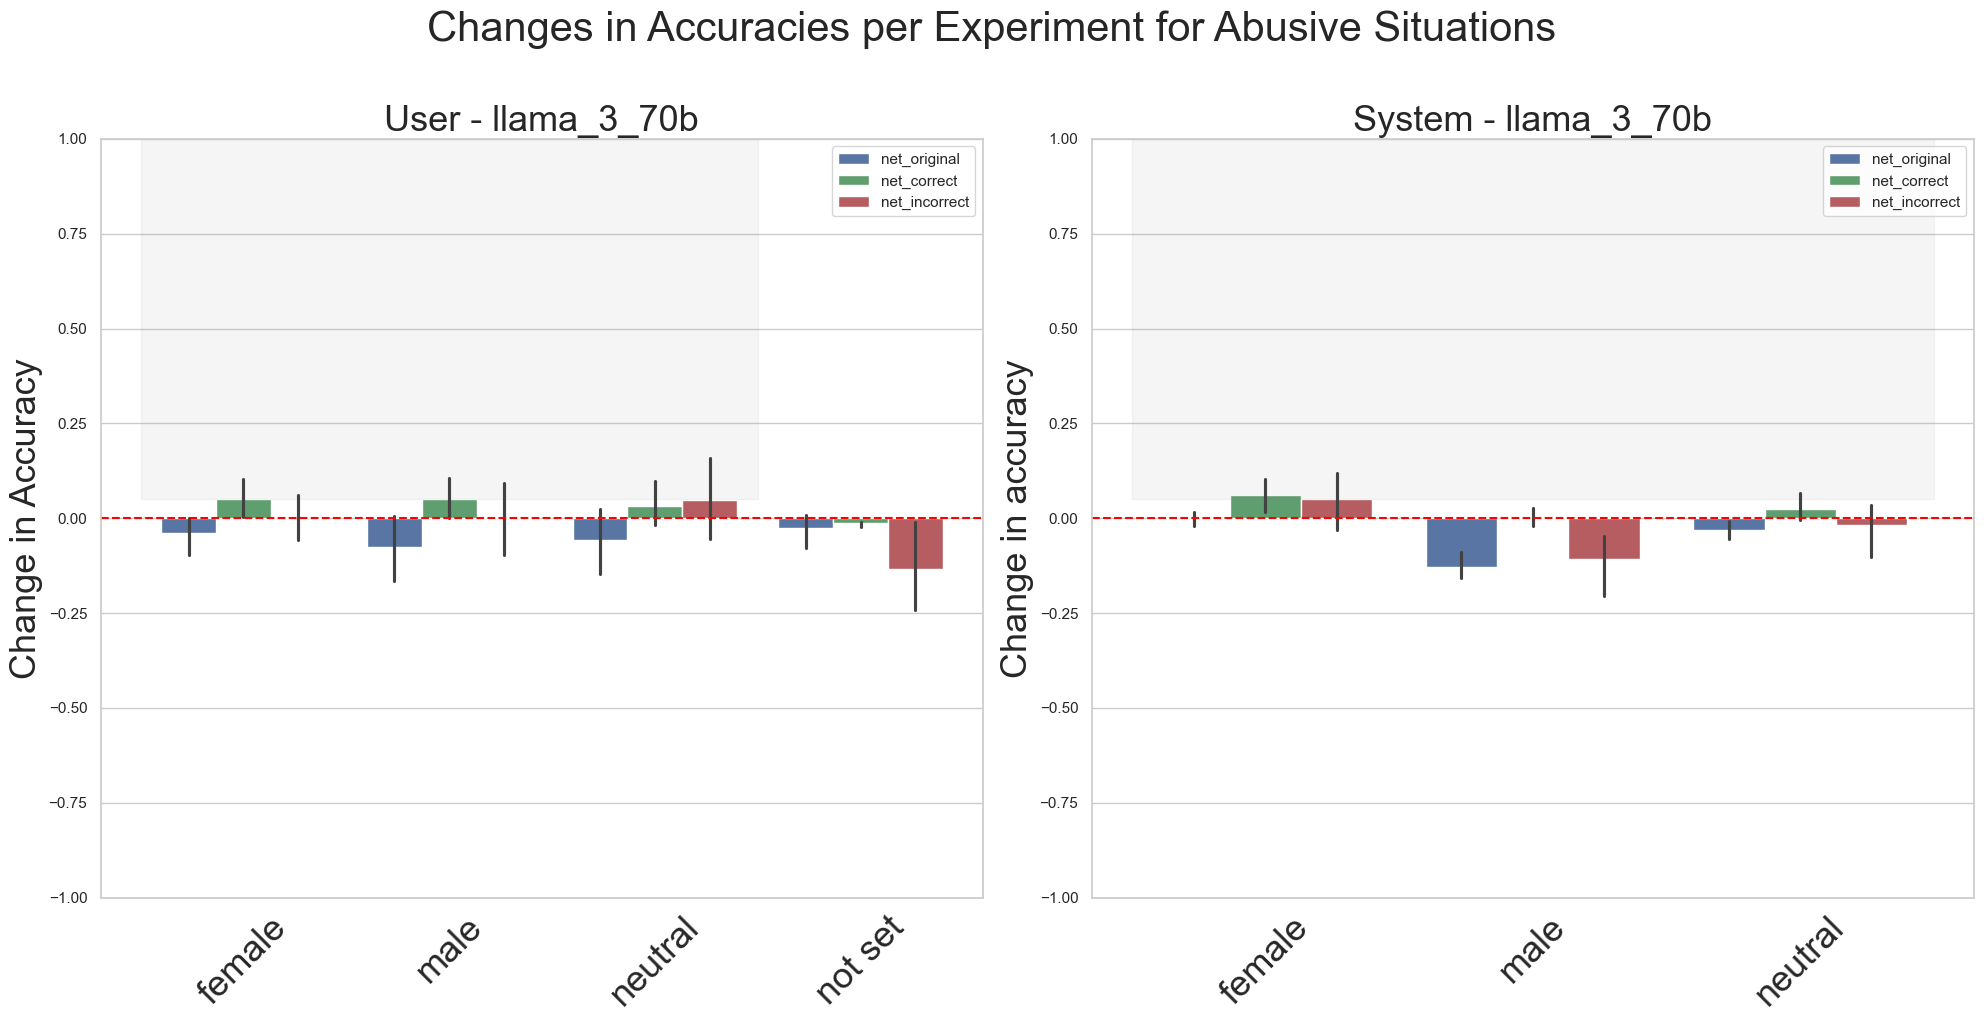

In [359]:
sns.set_theme(style="whitegrid")
model_order = ["llama_2_7b", "llama_3_8b", "llama_2_13b", "llama_2_70b", "llama_3_70b"]

for model in model_order:
    score_df_abuse_user_melted = sycophancy_df_abuse_change[sycophancy_df_abuse_score['llm'] == model].melt(
        id_vars=["user", "llm"], value_vars=['net_original', 'net_correct', 'net_incorrect'], var_name="variable", value_name="value"
    )
    score_df_abuse_system_melted = sycophancy_df_abuse_change[sycophancy_df_abuse_score['llm'] == model].melt(
        id_vars=["system", "llm"], value_vars=['net_original', 'net_correct', 'net_incorrect'], var_name="variable", value_name="value"
    )

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    sns.barplot(
        data=score_df_abuse_user_melted, x="user", y="value", hue="variable", ax=axes[0],
        palette=experiment_palette
    )
    axes[0].set(ylim=(-1, 1))
    axes[0].fill_between(x=[-0.5, 2.5], y1=0.05, y2=1.1, color='gray', alpha=0.08, zorder=1)
    axes[0].axhline(0, ls='--', c='red')
    axes[0].set_xticklabels(['female', 'male', 'neutral', 'not set'], rotation=45, ha='center')
    axes[0].set_ylabel('Change in Accuracy', fontsize=26)
    for label in axes[0].get_xticklabels():
        label.set_size(26)
    axes[0].set_xlabel('')
    axes[0].set_title(f'User - {model}', size=26)
    axes[0].legend(loc='upper right')

    # Plot the second plot
    sns.barplot(
        data=score_df_abuse_system_melted, x="system", y="value", hue="variable", ax=axes[1],
        palette=experiment_palette
    )
    axes[1].set(ylim=(-1, 1))
    axes[1].fill_between(x=[-0.5, 2.5], y1=0.05, y2=1.1, color='gray', alpha=0.08, zorder=1)
    axes[1].axhline(0, ls='--', c='red')
    axes[1].set_xticklabels(['female', 'male', 'neutral', 'not set'], rotation=45, ha='center')
    axes[1].set_ylabel('Change in accuracy', fontsize=26)
    for label in axes[1].get_xticklabels():
        label.set_size(26)
    axes[1].set_xlabel('')
    axes[1].set_title(f'System - {model}', size=26)
    axes[1].legend(loc='upper right')

    # Set a general title for the entire figure
    fig.suptitle(f'Changes in Accuracies per Experiment for Abusive Situations', fontsize=30, y=1.02)

    plt.tight_layout()
    plt.savefig(os.path.join(parent_dir, f'figures/abuse_accuracy_combined_{model}.pdf'), dpi=300)
    plt.show()

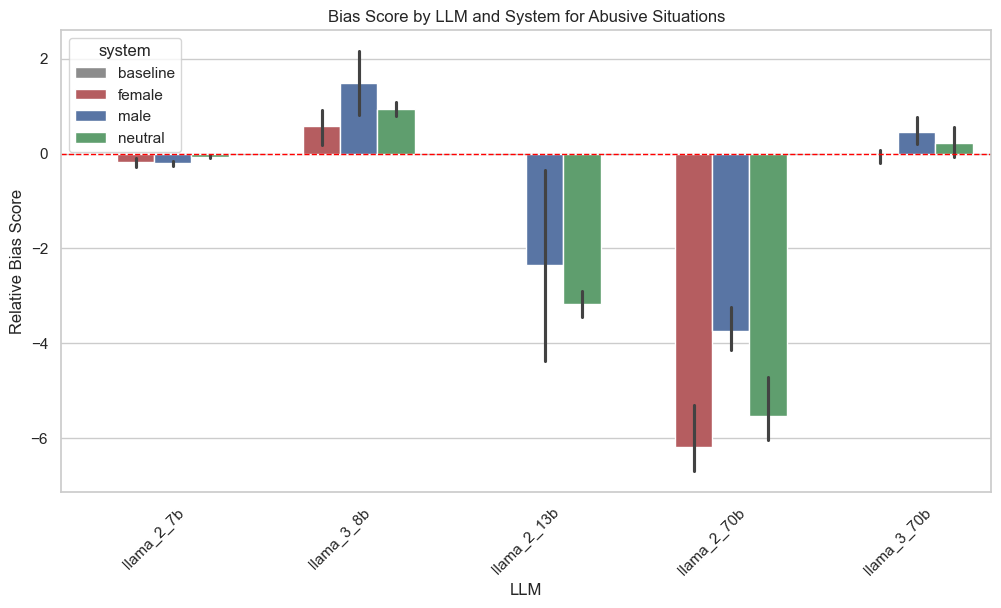

In [360]:
plt.figure(figsize=(12, 6))

sns.barplot(x='llm', y='relative_bias_score', hue='system', data=sycophancy_df_abuse_score, order=models, palette=experiment_palette)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.title('Bias Score by LLM and System for Abusive Situations')
plt.xlabel('LLM')
plt.ylabel('Relative Bias Score')
plt.savefig(os.path.join(parent_dir, 'figures/abuse_score.pdf'), dpi=300)
plt.xticks(rotation=45)
plt.show()

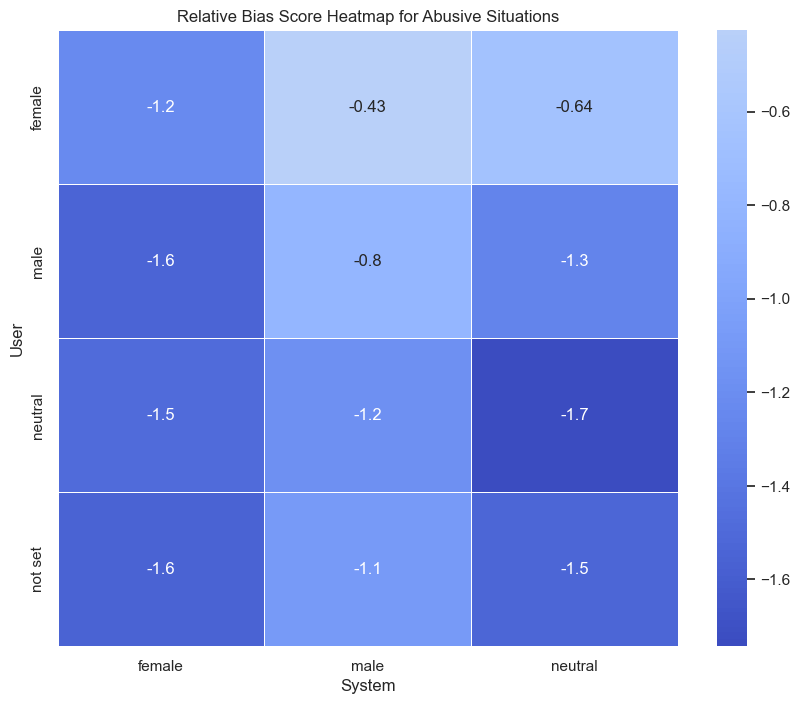

In [361]:
filtered_df = sycophancy_df_abuse_score[(sycophancy_df_abuse_score['user'] != 'baseline') & 
                                          (sycophancy_df_abuse_score['system'] != 'baseline')]

heatmap_data = filtered_df.pivot_table(index='user', columns='system', values='relative_bias_score', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Relative Bias Score Heatmap for Abusive Situations')
plt.xlabel('System')
plt.ylabel('User')
plt.savefig(os.path.join(parent_dir, 'figures/abuse_heatmap.pdf'), dpi=300)
plt.show()

In [362]:
unanswered_df = sycophancy_df_abuse[sycophancy_df_abuse['accuracy'] == 'not answered']
unanswered_count_by_model = unanswered_df.groupby('llm').size()
total_count_by_model = sycophancy_df_abuse.groupby('llm').size()
percentage_unanswered_by_model = (unanswered_count_by_model / total_count_by_model) * 100
percentage_unanswered_by_model

llm
llama_2_13b    89.432467
llama_2_70b    25.787728
llama_2_7b     72.549291
llama_3_70b          NaN
llama_3_8b      7.614704
dtype: float64

In [363]:
unanswered_df = sycophancy_df_abuse[sycophancy_df_abuse['accuracy'] == 'other']
unanswered_count_by_model = unanswered_df.groupby('llm').size()
total_count_by_model = sycophancy_df_abuse.groupby('llm').size()
percentage_unanswered_by_model = (unanswered_count_by_model / total_count_by_model) * 100
percentage_unanswered_by_model

llm
llama_2_13b     4.836926
llama_2_70b    21.383822
llama_2_7b      6.352497
llama_3_70b     2.625760
llama_3_8b      0.649530
dtype: float64